**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**PATH OF THE FILE**

In [2]:
data=pd.read_csv(r"C:\Users\admin2\Downloads\EV_Data.csv")

In [3]:
new_data=data.copy()

In [4]:
data

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2.110722e+06,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,None,Married,Post Graduate,4,1.616288e+06,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2.202829e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,None,Married,Graduate,4,1.764744e+06,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"


**DATA PREPROCESSING**

In [5]:
data.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [6]:
data.tail()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
995,995,31,Pune,None,Married,Graduate,7,2.110722e+06,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,None,Married,Post Graduate,4,1.616288e+06,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2.202829e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,None,Married,Graduate,4,1.764744e+06,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"
999,999,30,Pune,Business,Single,Graduate,4,2.486664e+06,No,Liftback,Yes,Maruti,<5 lakhs,4,"Yes, in <10 years"


In [7]:
data.shape

(1000, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [9]:
data.describe()

,Unnamed: 0,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,31.800000,4.118000,2.258342e+06,3.349000
std,288.819436,11.294847,1.469774,9.993558e+05,0.887686
min,0.000000,15.000000,0.000000,-3.761509e+05,2.000000
25%,249.750000,26.000000,4.000000,1.782116e+06,2.000000
50%,499.500000,29.000000,4.000000,2.329246e+06,4.000000
75%,749.250000,31.000000,5.000000,2.753170e+06,4.000000
max,999.000000,118.000000,8.000000,1.282128e+07,4.000000


In [10]:
data.isnull().sum()

Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [11]:
data.dtypes

Unnamed: 0                                                                int64
Age                                                                       int64
City                                                                     object
Profession                                                               object
Marital Status                                                           object
Education                                                                object
No. of Family members                                                     int64
Annual Income                                                           float64
Would you prefer replacing all your vehicles to Electronic vehicles?     object
If Yes/Maybe what type of  EV would you prefer?                          object
Do you think Electronic Vehicles are economical?                         object
Which brand of vehicle do you currently own?                             object
How much money could you spend on an Ele

In [12]:
data.count()

Unnamed: 0                                                              1000
Age                                                                     1000
City                                                                    1000
Profession                                                              1000
Marital Status                                                          1000
Education                                                               1000
No. of Family members                                                   1000
Annual Income                                                           1000
Would you prefer replacing all your vehicles to Electronic vehicles?    1000
If Yes/Maybe what type of  EV would you prefer?                         1000
Do you think Electronic Vehicles are economical?                        1000
Which brand of vehicle do you currently own?                            1000
How much money could you spend on an Electronic vehicle?                1000

In [13]:
data['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38], dtype=int64)

In [14]:
data['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [15]:
data['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [16]:
data['Education'].unique()

array(['Graduate', 'Post Graduate'], dtype=object)

In [17]:
data['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7], dtype=int64)

In [18]:
data['Which brand of vehicle do you currently own?'].unique()

array(['Hyundai', 'Honda', 'KIA', 'McLaren ', 'Volkswagen', 'MG', 'Tata',
       'Nissan', 'Chevrolet ', 'Suzuki ', 'Maruti', 'Maruti ',
       'Maruti Suzuki', 'Nexa', 'Audi', 'BMW'], dtype=object)

In [19]:
data['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [20]:
data['Preference for wheels in EV'].unique()

array([2, 4, 3], dtype=int64)

In [21]:
data['Do you think Electronic vehicles will replace fuel cars in India?'].unique()

array(["I don't think so", 'Yes, in <20years', 'Yes, in <10 years',
       'Yes, possibly after 20 years'], dtype=object)

In [22]:
data.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

**DATA VISUALIZATION**

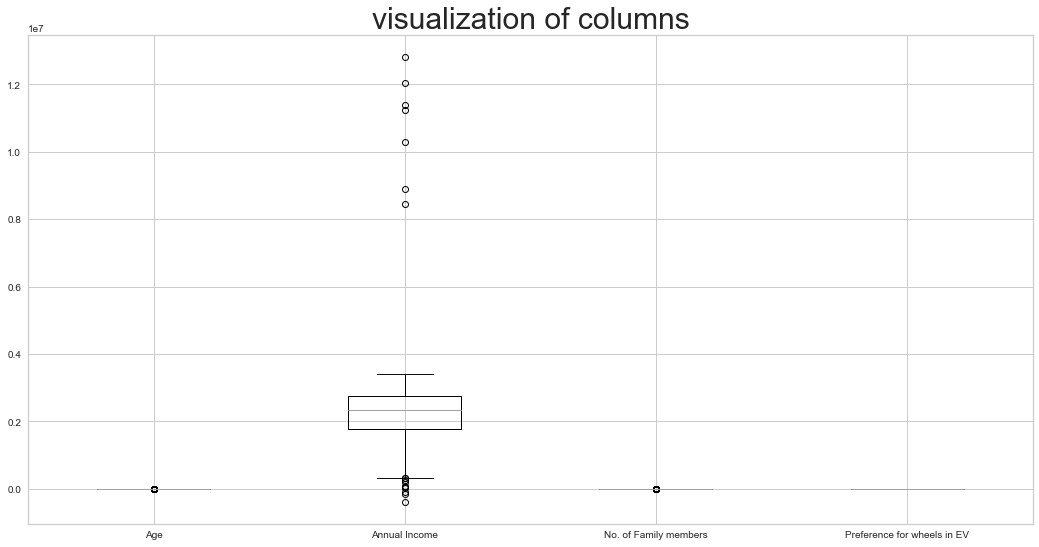

In [23]:
cols_names = ['Age','Annual Income','No. of Family members',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV']
plt.figure(figsize=(18,9))
data[cols_names].boxplot()
plt.title('visualization of columns',fontsize=30)
plt.show()

<AxesSubplot:xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

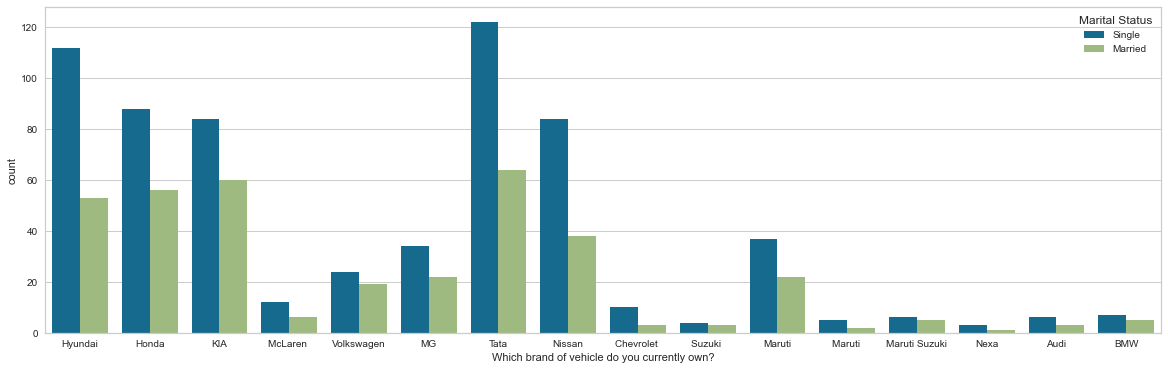

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x='Which brand of vehicle do you currently own?',data=data,hue='Marital Status')

<AxesSubplot:xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

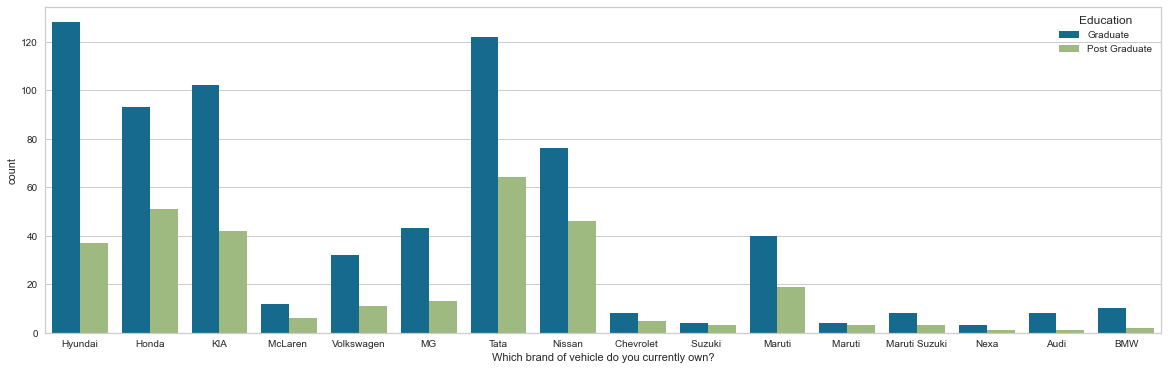

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x='Which brand of vehicle do you currently own?',data=data,hue='Education')

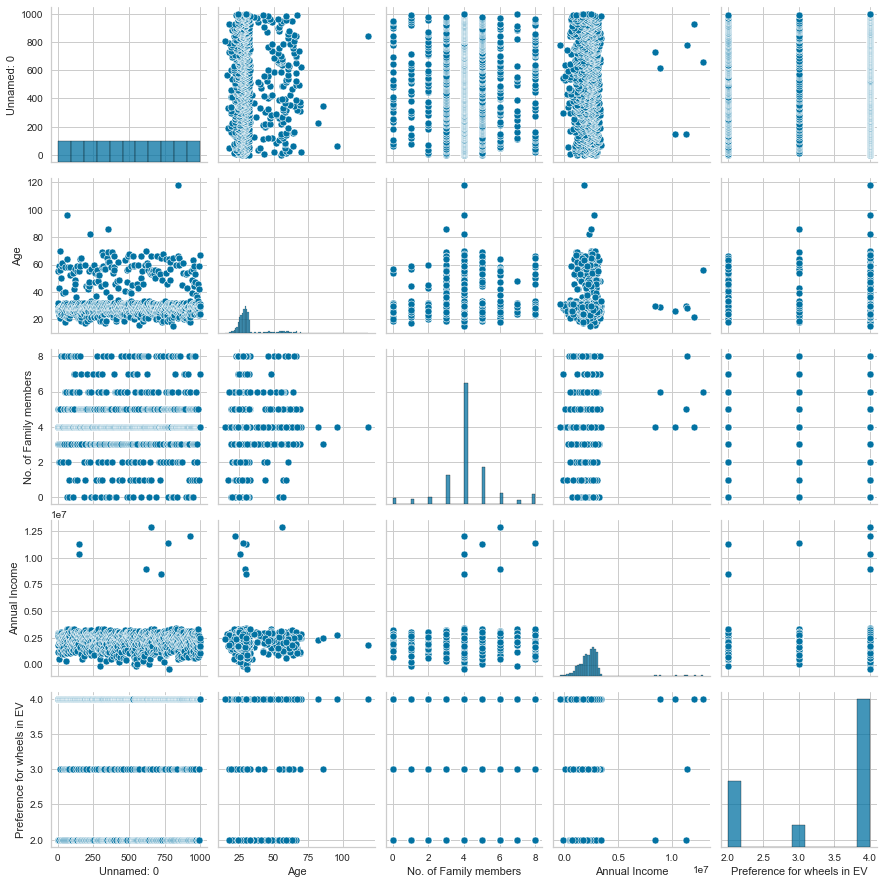

In [26]:
sns.pairplot(data)

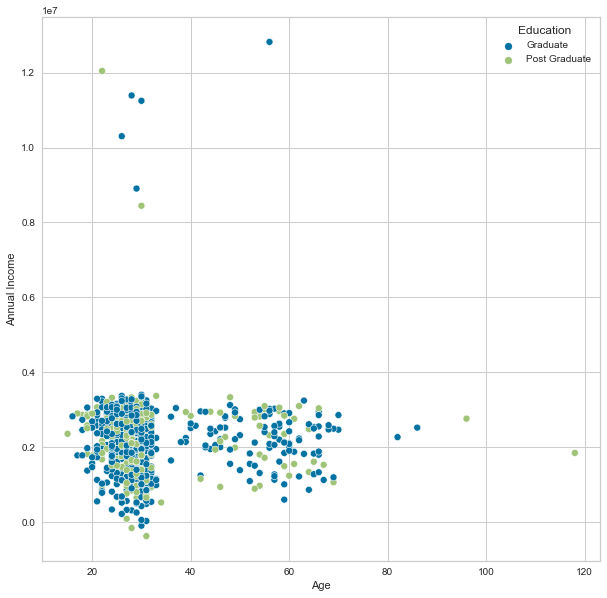

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age',y='Annual Income',data=data,hue='Education')
plt.show()

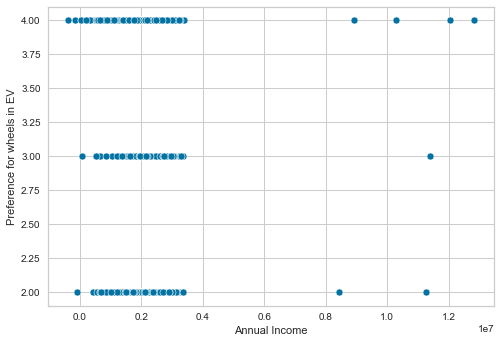

In [28]:
#plt.figure(figsize=(5,10))
sns.scatterplot(x='Annual Income',y='Preference for wheels in EV',data=data)
plt.show()

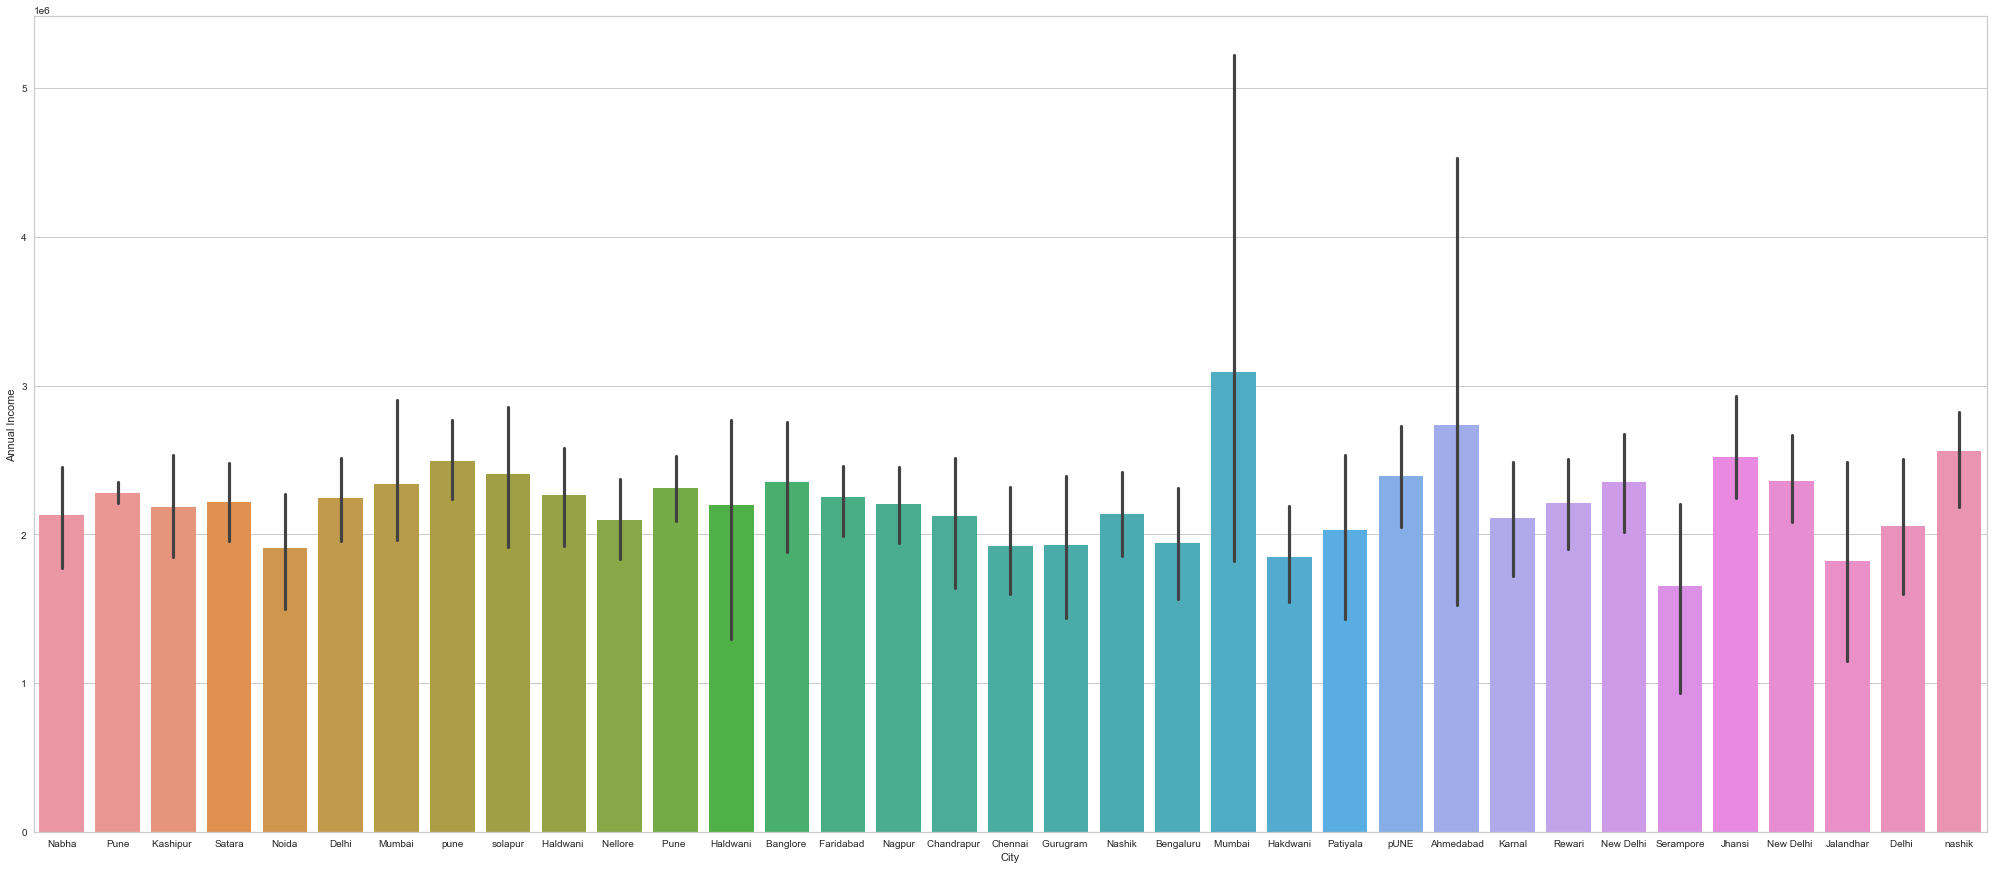

In [29]:
plt.figure(figsize=(35,15))# size will be as row by column
sns.barplot(data['City'],data['Annual Income'])
plt.show()

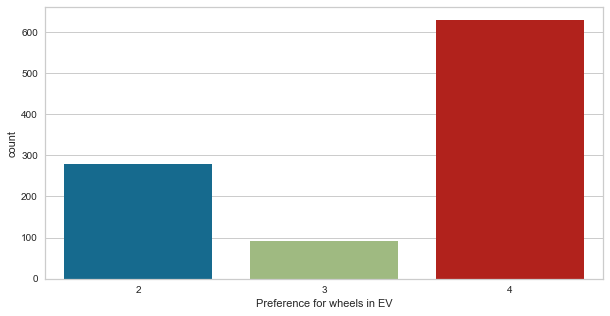

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data['Preference for wheels in EV'])
plt.show()

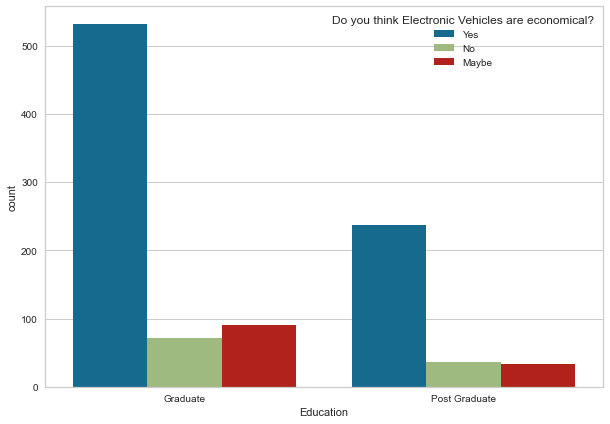

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x='Education',hue='Do you think Electronic Vehicles are economical?',data=data)
plt.show()

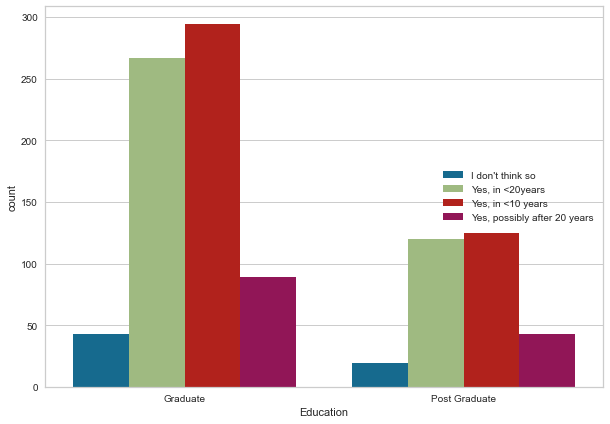

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='Education', hue = 'Do you think Electronic vehicles will replace fuel cars in India?',data=data)
plt.legend(loc='center right')
plt.show()

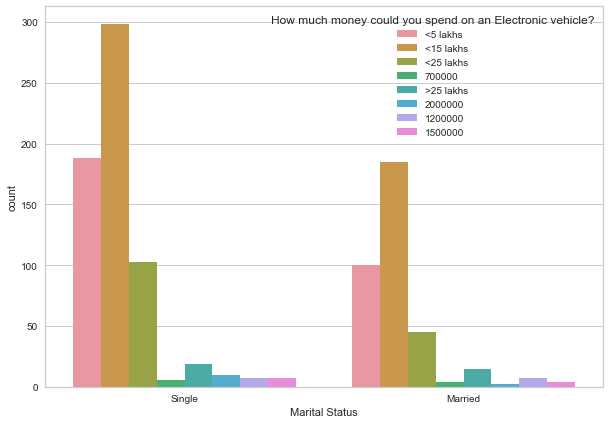

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = data)
plt.show()

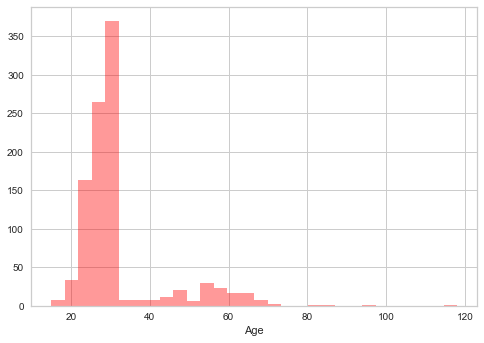

In [34]:
sns.distplot(data['Age'], kde = False, color ='red', bins = 30)
plt.show()

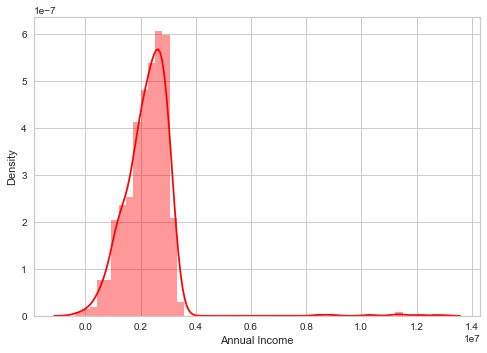

In [35]:
sns.distplot(data['Annual Income'],color = 'red')
plt.show()

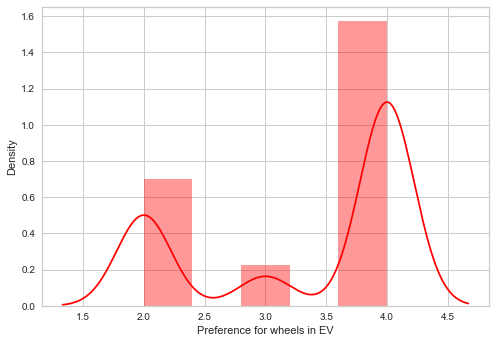

In [36]:
sns.distplot(data['Preference for wheels in EV'],color = 'red')
plt.show()

<AxesSubplot:xlabel='No. of Family members', ylabel='Which brand of vehicle do you currently own?'>

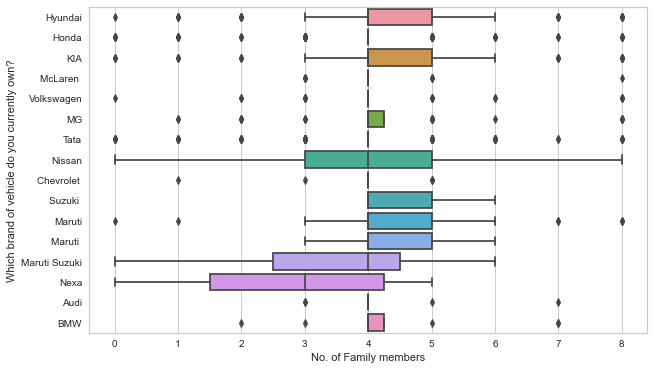

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data['No. of Family members'], data['Which brand of vehicle do you currently own?'])

<AxesSubplot:xlabel='Age', ylabel='Which brand of vehicle do you currently own?'>

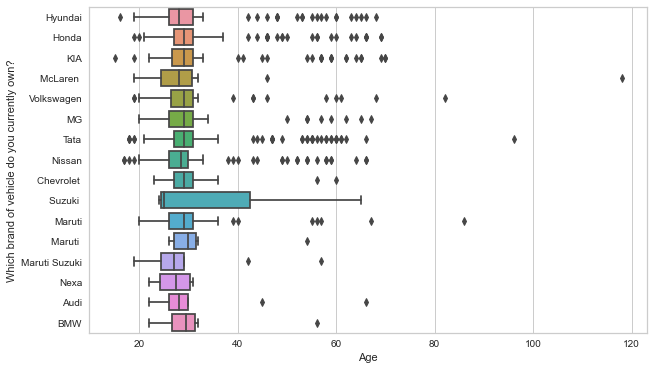

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Age'], data['Which brand of vehicle do you currently own?'])

<Figure size 792x648 with 0 Axes>

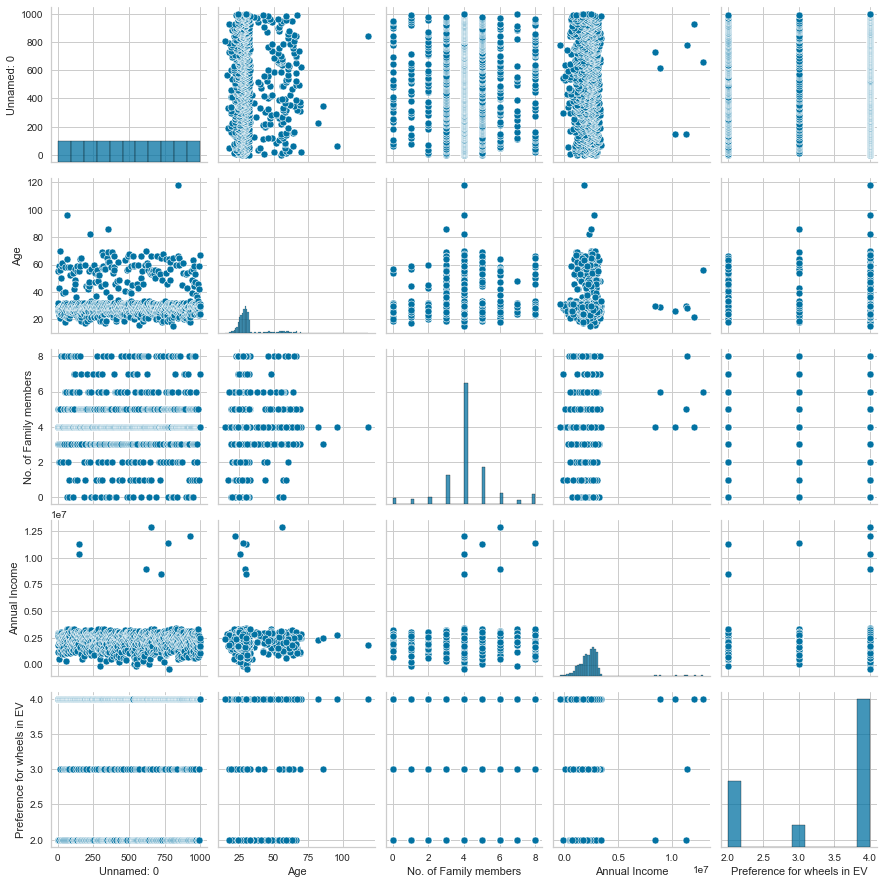

In [39]:
plt.figure(figsize=(11,9))
sns.pairplot(data)
plt.show()

<AxesSubplot:>

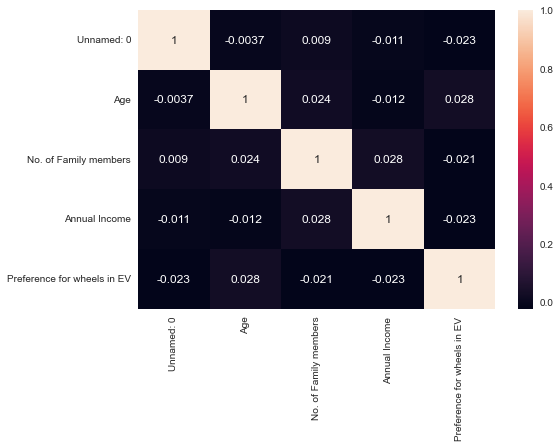

In [40]:
sns.heatmap(data.corr(),annot=True)

**ENCODING**

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
data['City']=le.fit_transform(data['City'])
data['Profession']=le.fit_transform(data['Profession'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Education']=le.fit_transform(data['Education'])
data['Would you prefer replacing all your vehicles to Electronic vehicles?']=le.fit_transform(data['Would you prefer replacing all your vehicles to Electronic vehicles?'])
data['If Yes/Maybe what type of  EV would you prefer?'] = le.fit_transform(data['If Yes/Maybe what type of  EV would you prefer?'])
data['Do you think Electronic Vehicles are economical?']=le.fit_transform(data['Do you think Electronic Vehicles are economical?'])
data['Which brand of vehicle do you currently own?']=le.fit_transform(data['Which brand of vehicle do you currently own?'])
data['How much money could you spend on an Electronic vehicle?']=le.fit_transform(data['How much money could you spend on an Electronic vehicle?'])
data['Preference for wheels in EV']=le.fit_transform(data['Preference for wheels in EV'])
data['Do you think Electronic vehicles will replace fuel cars in India?']=le.fit_transform(data['Do you think Electronic vehicles will replace fuel cars in India?'])

In [44]:
data

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,18,1,1,0,5,1.193876e+06,0,3,2,4,6,0,0
1,1,27,26,1,1,0,4,1.844540e+06,2,3,2,3,4,2,2
2,2,32,15,1,1,0,4,2.948150e+06,2,1,2,5,4,2,2
3,3,55,26,0,1,0,3,2.832380e+06,0,1,1,4,6,2,1
4,4,26,29,1,1,0,4,2.638751e+06,2,4,2,10,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,26,1,0,0,7,2.110722e+06,2,3,2,5,5,2,1
996,996,29,26,1,0,1,4,1.616288e+06,1,3,2,5,6,2,2
997,997,30,16,0,1,0,4,2.202829e+06,2,3,2,3,4,2,2
998,998,24,0,1,0,0,4,1.764744e+06,2,3,2,7,4,2,2


**K-MEANS MODEL**

Elbow Method to determine the number of clusters to be formed:


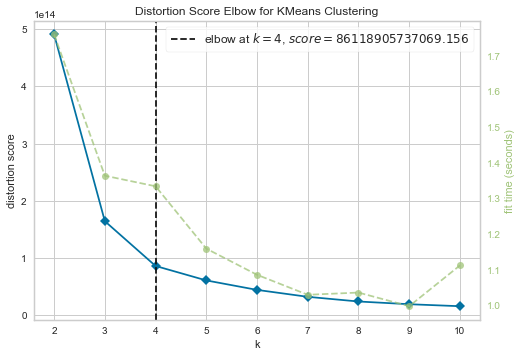

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

In [46]:
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
X = data.iloc[:,:-1].values
print(X)

[[  0.  30.  18. ...   4.   6.   0.]
 [  1.  27.  26. ...   3.   4.   2.]
 [  2.  32.  15. ...   5.   4.   2.]
 ...
 [997.  30.  16. ...   3.   4.   2.]
 [998.  24.   0. ...   7.   4.   2.]
 [999.  30.  26. ...   8.   6.   2.]]


In [47]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 0 2 2 2 2 2 0 0 3 2 0 3 0 0 2 0 0 2 3 2 2 2 0 3 0 0 0 0 0 3 2 0 2 0 0 2
 0 2 3 0 3 0 0 2 3 2 2 3 2 2 2 2 3 0 3 3 2 0 2 0 2 3 3 2 3 2 0 2 2 2 2 2 3
 2 0 2 0 2 2 2 2 0 3 3 0 2 0 3 0 0 2 0 2 2 0 3 0 0 2 2 0 3 3 2 2 0 0 0 3 2
 0 0 0 2 2 2 2 0 0 2 0 0 3 2 0 0 2 0 0 2 3 3 3 2 2 0 0 2 0 2 2 0 0 2 2 2 0
 2 1 2 1 2 2 3 2 2 0 2 0 2 2 2 2 3 2 2 0 2 0 0 2 3 2 0 0 2 3 0 2 2 0 0 0 2
 3 2 0 0 2 3 2 2 2 0 3 0 0 2 0 3 2 0 2 2 0 0 2 0 3 0 2 2 3 2 2 0 2 2 2 3 0
 2 0 2 0 2 2 0 0 2 0 2 3 3 3 2 2 2 0 0 0 2 0 0 0 0 2 2 0 0 2 0 2 2 2 3 2 0
 2 2 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0 2 2 0 3 3 3 2 2 0 0 3 0 2 2 2 3 3
 2 3 3 3 2 0 0 2 0 3 0 2 3 0 2 2 3 2 2 3 3 3 2 2 0 3 0 0 2 0 2 3 2 2 0 0 3
 0 0 2 0 0 3 0 2 2 3 3 2 0 2 3 3 2 2 3 3 0 0 2 0 3 0 0 0 2 0 0 0 2 0 2 2 2
 2 3 3 2 2 2 0 2 3 2 0 0 3 3 0 3 3 2 3 2 2 2 0 3 0 0 0 0 2 2 0 2 2 0 3 0 2
 2 3 3 0 2 2 0 3 0 2 0 2 2 2 0 2 3 3 0 2 3 0 2 0 3 0 3 0 0 0 2 0 2 0 3 2 0
 2 3 0 0 2 2 0 2 2 2 0 0 0 0 3 2 0 2 0 3 0 0 3 2 2 3 2 3 2 0 3 3 2 2 2 0 2
 2 0 2 2 2 0 3 2 0 2 0 2 

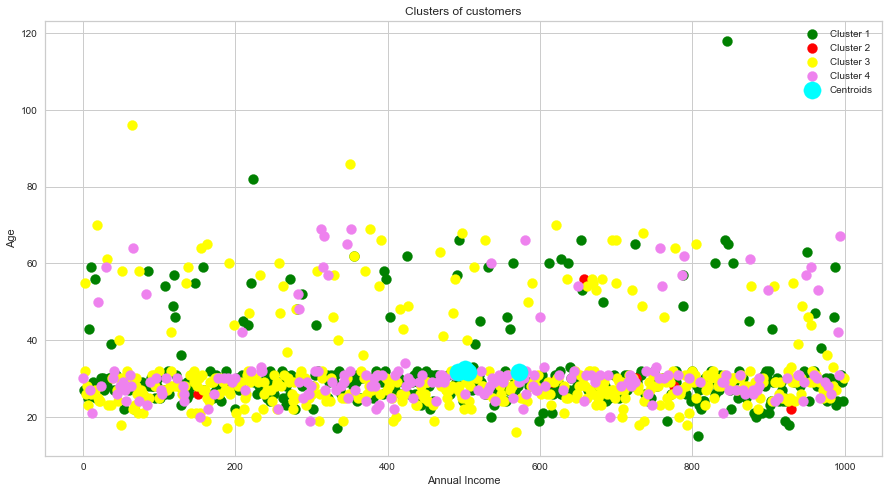

In [48]:
plt.figure(figsize=(15,8))

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()
plt.show()

In [49]:
data

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,18,1,1,0,5,1.193876e+06,0,3,2,4,6,0,0
1,1,27,26,1,1,0,4,1.844540e+06,2,3,2,3,4,2,2
2,2,32,15,1,1,0,4,2.948150e+06,2,1,2,5,4,2,2
3,3,55,26,0,1,0,3,2.832380e+06,0,1,1,4,6,2,1
4,4,26,29,1,1,0,4,2.638751e+06,2,4,2,10,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,26,1,0,0,7,2.110722e+06,2,3,2,5,5,2,1
996,996,29,26,1,0,1,4,1.616288e+06,1,3,2,5,6,2,2
997,997,30,16,0,1,0,4,2.202829e+06,2,3,2,3,4,2,2
998,998,24,0,1,0,0,4,1.764744e+06,2,3,2,7,4,2,2


In [50]:
new_data

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2.110722e+06,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,None,Married,Post Graduate,4,1.616288e+06,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2.202829e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,None,Married,Graduate,4,1.764744e+06,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"


In [51]:
new_data['Cluster']=Y
new_data['Cluster']

0      3
1      0
2      2
3      2
4      2
      ..
995    0
996    0
997    0
998    0
999    2
Name: Cluster, Length: 1000, dtype: int32

In [52]:
new_data['Cluster'].value_counts()

2    430
0    368
3    195
1      7
Name: Cluster, dtype: int64

In [53]:
# Segregrating each cluster

Cluster_0 = new_data[new_data.Cluster==0]
Cluster_1 = new_data[new_data.Cluster==1]
Cluster_2 = new_data[new_data.Cluster==2]
Cluster_3 = new_data[new_data.Cluster==3]
print(Cluster_0.shape)
print(Cluster_1.shape)
print(Cluster_2.shape)
print(Cluster_3.shape)

(368, 16)
(7, 16)
(430, 16)
(195, 16)


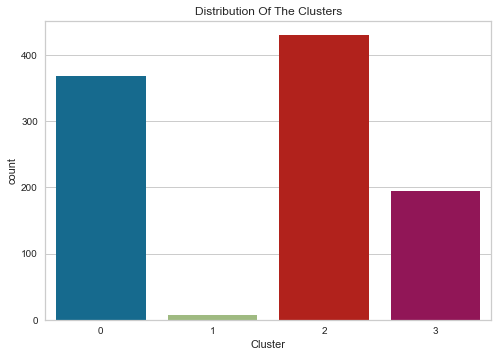

In [54]:
#Plotting countplot of clusters
pl = sns.countplot(x=new_data["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [55]:
a=[Cluster_0['Age'].value_counts().head(), 
 Cluster_1['Age'].value_counts().head(), 
 Cluster_2['Age'].value_counts().head(), 
 Cluster_3['Age'].value_counts().head()]
a

[29    45
 28    42
 30    37
 31    36
 27    35
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 56    1
 28    1
 Name: Age, dtype: int64,
 29    47
 28    43
 30    43
 25    38
 26    38
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 27    18
 28    16
 Name: Age, dtype: int64]

**CLUSTERING FOR 0 TO 3 CLUSTERS WITH THERE VISUALIZATION**

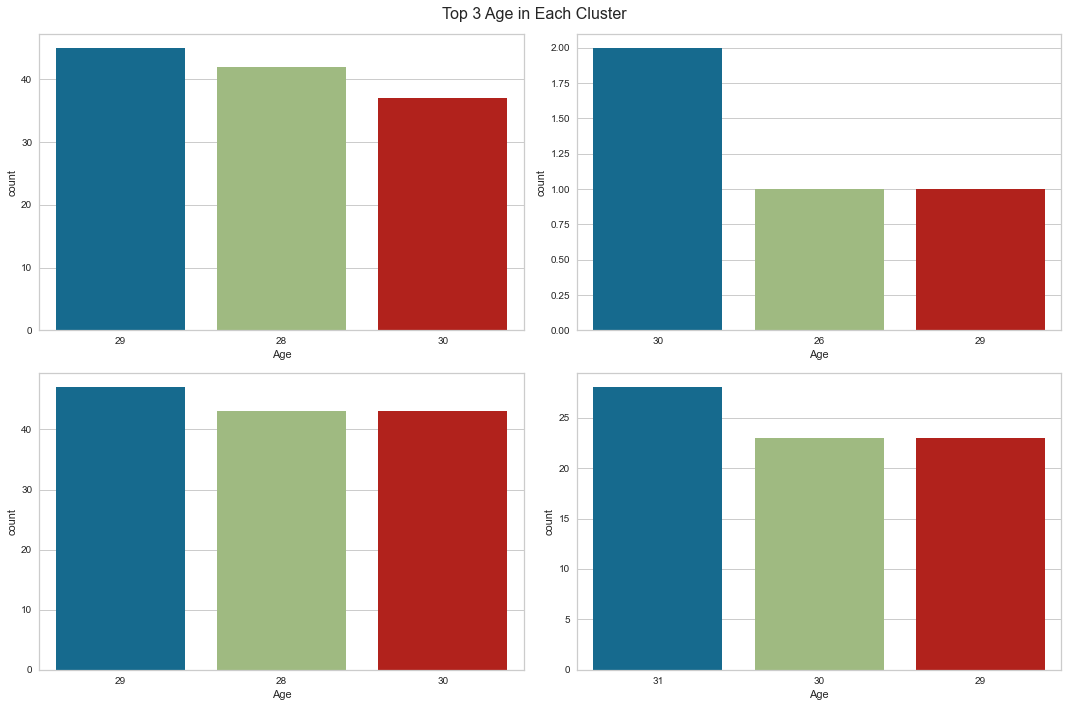

In [56]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Age in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Age', data=Cluster_0, order=Cluster_0['Age'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Age', data=Cluster_1, order=Cluster_1['Age'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Age', data=Cluster_2, order=Cluster_2['Age'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Age', data=Cluster_3, order=Cluster_3['Age'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [57]:
[Cluster_0['City'].value_counts().head(), 
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[Pune      208
 Pune       16
 Mumbai     14
 Satara      9
 Nagpur      8
 Name: City, dtype: int64,
 Pune         4
 Mumbai       1
 Ahmedabad    1
 Mumbai       1
 Name: City, dtype: int64,
 Pune         257
 Mumbai        19
 Pune          16
 Delhi         12
 New Delhi     11
 Name: City, dtype: int64,
 Pune       101
 Mumbai      11
 Chennai      6
 Pune         6
 Noida        5
 Name: City, dtype: int64]

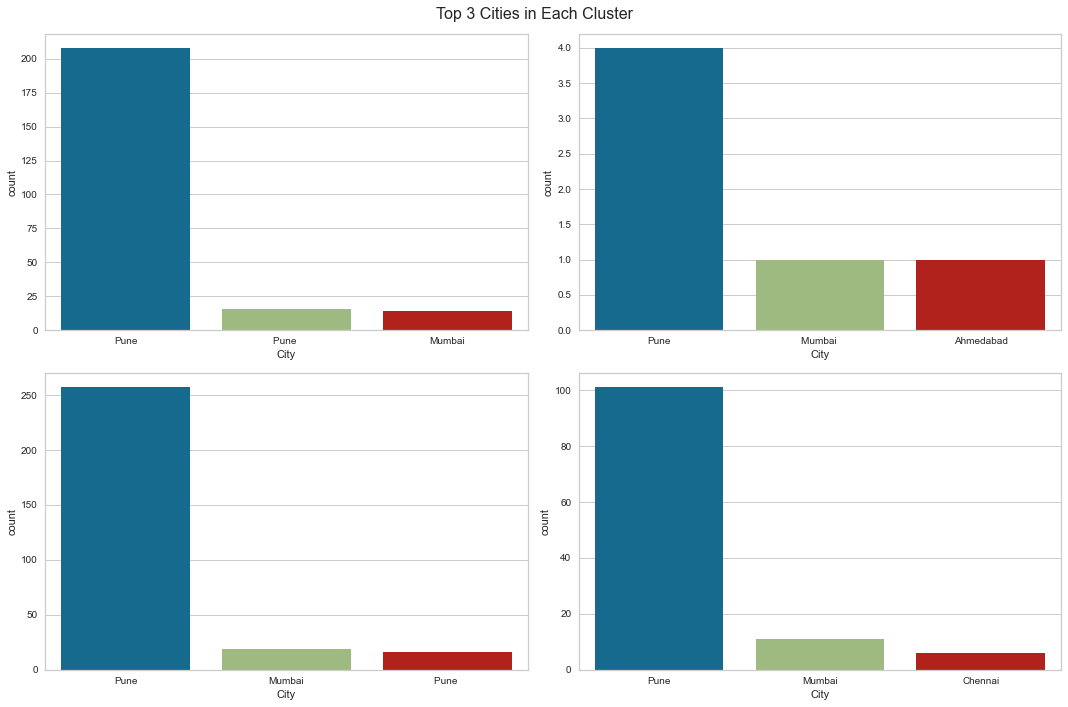

In [58]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Cities in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='City', data=Cluster_0, order=Cluster_0['City'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='City', data=Cluster_1, order=Cluster_1['City'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='City', data=Cluster_2, order=Cluster_2['City'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='City', data=Cluster_3, order=Cluster_3['City'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [59]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[None                    161
 Working Professional    132
 Business                 61
 Salaried                 14
 Name: Profession, dtype: int64,
 None                    5
 Working Professional    1
 Business                1
 Name: Profession, dtype: int64,
 None                    207
 Working Professional    135
 Business                 73
 Salaried                 15
 Name: Profession, dtype: int64,
 None                    87
 Working Professional    68
 Business                32
 Salaried                 8
 Name: Profession, dtype: int64]

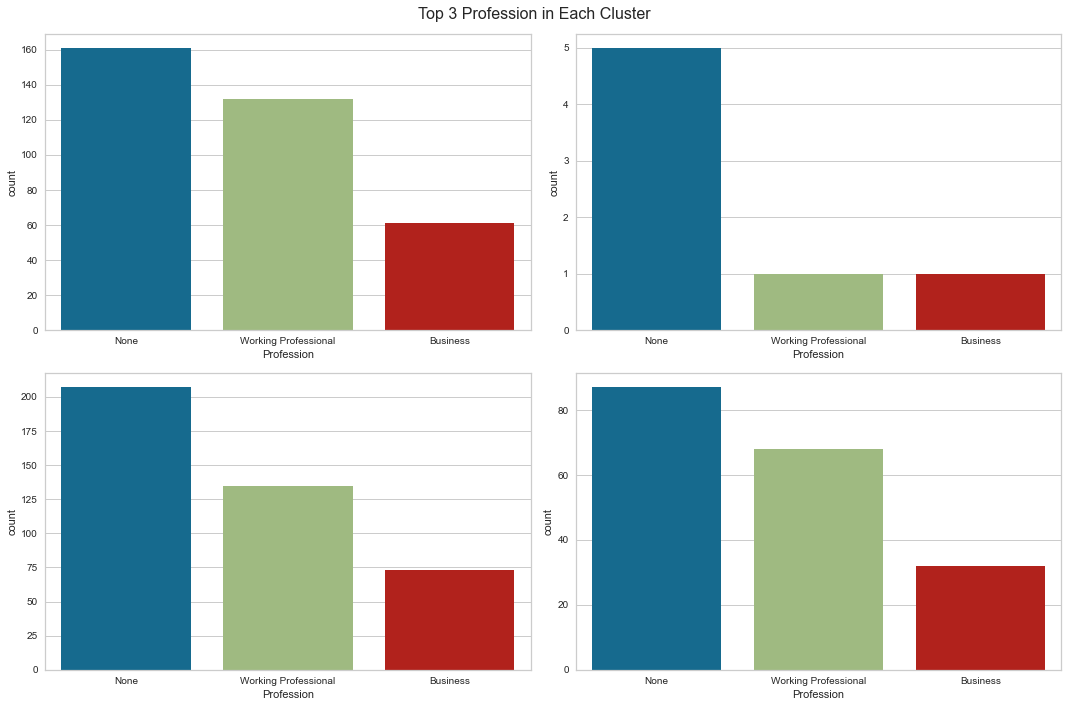

In [60]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Profession in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Profession', data=Cluster_0, order=Cluster_0['Profession'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Profession', data=Cluster_1, order=Cluster_1['Profession'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Profession', data=Cluster_2, order=Cluster_2['Profession'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Profession', data=Cluster_3, order=Cluster_3['Profession'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [61]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Single     220
 Married    148
 Name: Marital Status, dtype: int64,
 Married    5
 Single     2
 Name: Marital Status, dtype: int64,
 Single     283
 Married    147
 Name: Marital Status, dtype: int64,
 Single     133
 Married     62
 Name: Marital Status, dtype: int64]

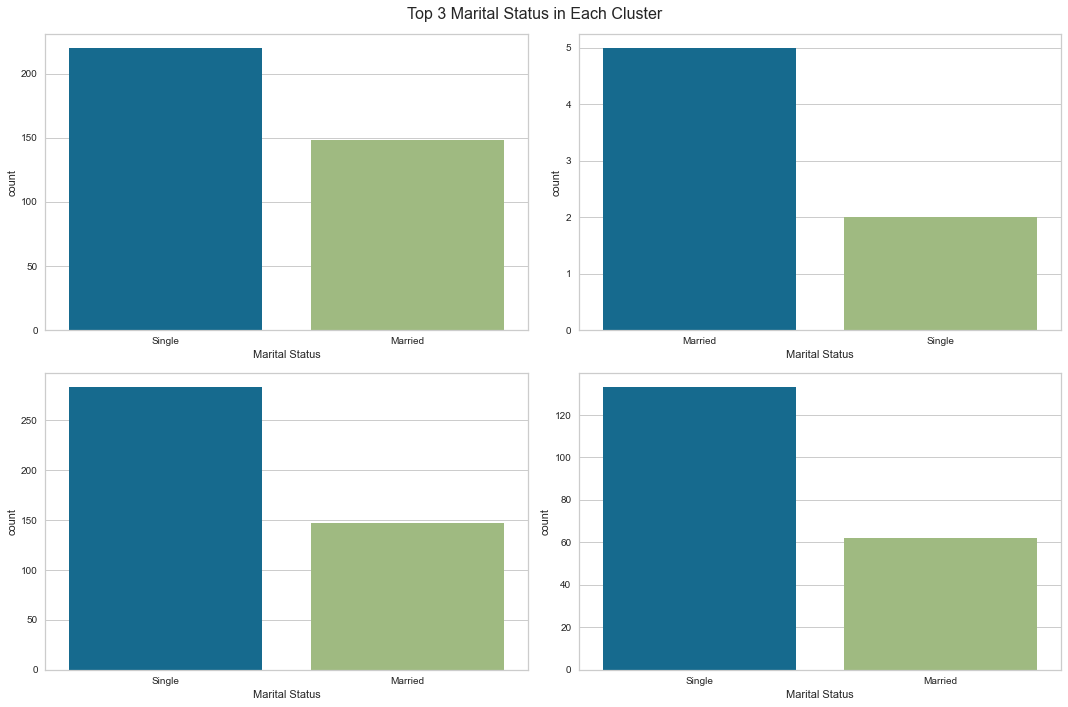

In [62]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Marital Status in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Marital Status', data=Cluster_0, order=Cluster_0['Marital Status'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Marital Status', data=Cluster_1, order=Cluster_1['Marital Status'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Marital Status', data=Cluster_2, order=Cluster_2['Marital Status'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Marital Status', data=Cluster_3, order=Cluster_3['Marital Status'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [63]:
[Cluster_0['Education'].value_counts().head(), 
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Graduate         260
 Post Graduate    108
 Name: Education, dtype: int64,
 Graduate         5
 Post Graduate    2
 Name: Education, dtype: int64,
 Graduate         298
 Post Graduate    132
 Name: Education, dtype: int64,
 Graduate         130
 Post Graduate     65
 Name: Education, dtype: int64]

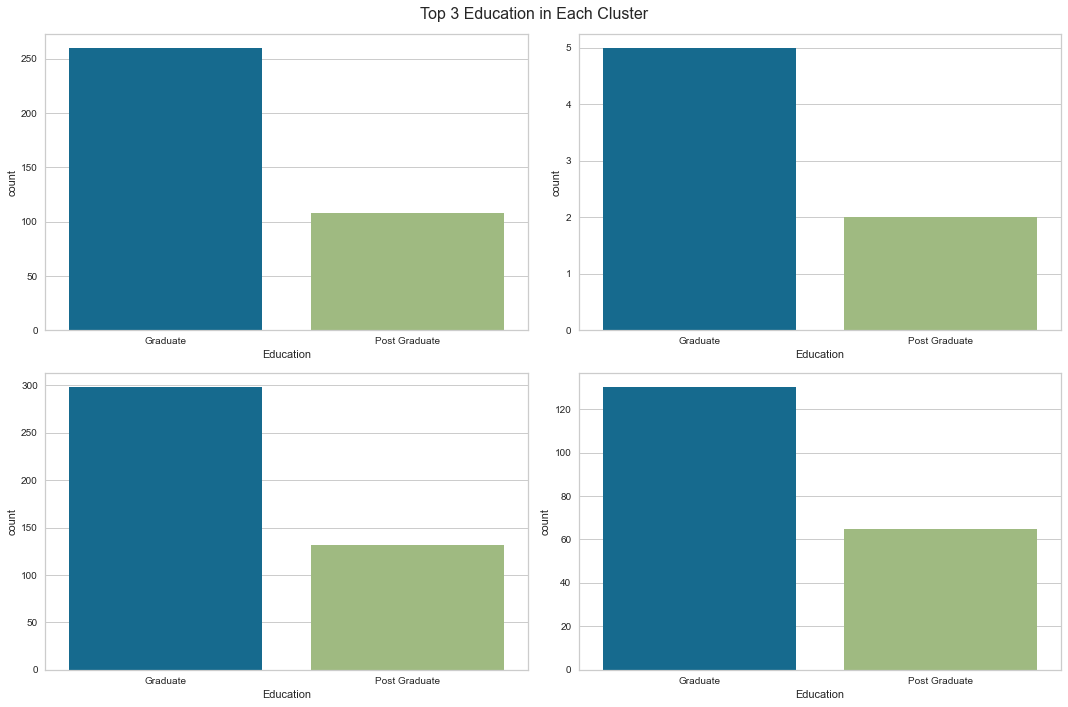

In [64]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Education in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Education', data=Cluster_0, order=Cluster_0['Education'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Education', data=Cluster_1, order=Cluster_1['Education'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Education', data=Cluster_2, order=Cluster_2['Education'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Education', data=Cluster_3, order=Cluster_3['Education'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [65]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

[4    194
 5     57
 3     46
 8     22
 6     12
 Name: No. of Family members, dtype: int64,
 4    3
 6    2
 5    1
 8    1
 Name: No. of Family members, dtype: int64,
 4    231
 5     63
 3     59
 6     22
 2     14
 Name: No. of Family members, dtype: int64,
 4    88
 5    37
 3    22
 6    14
 8    12
 Name: No. of Family members, dtype: int64]

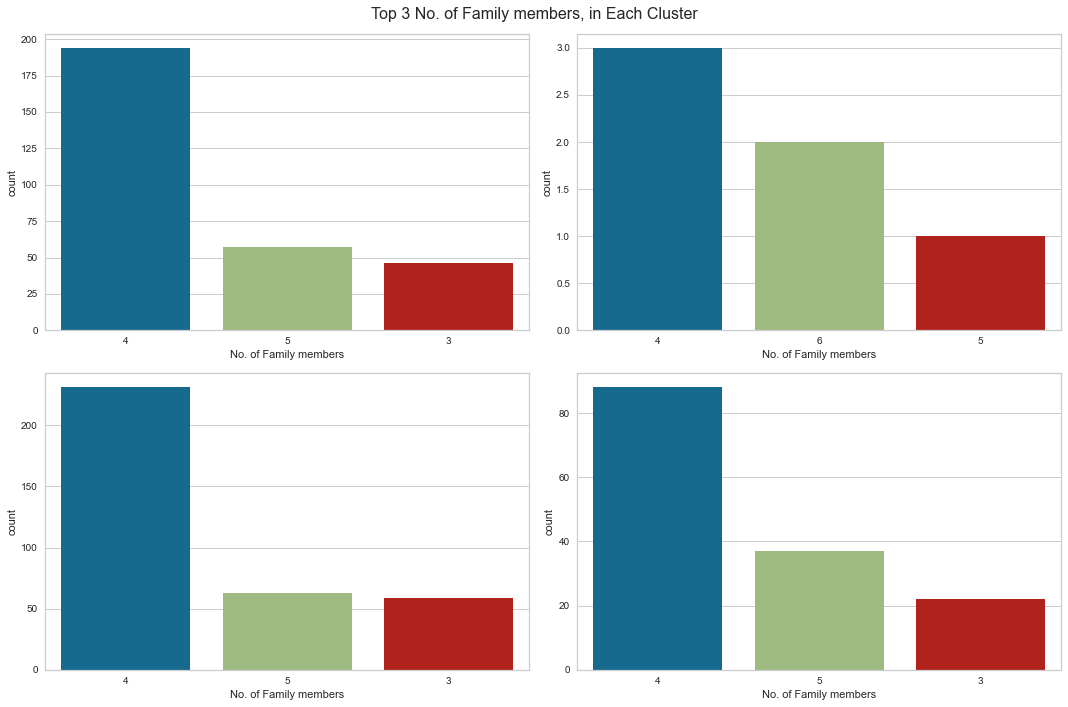

In [66]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 No. of Family members, in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='No. of Family members', data=Cluster_0, order=Cluster_0['No. of Family members'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='No. of Family members', data=Cluster_1, order=Cluster_1['No. of Family members'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='No. of Family members', data=Cluster_2, order=Cluster_2['No. of Family members'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='No. of Family members', data=Cluster_3, order=Cluster_3['No. of Family members'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [67]:
[Cluster_0['Annual Income'].value_counts().head(), 
 Cluster_1['Annual Income'].value_counts().head(), 
 Cluster_2['Annual Income'].value_counts().head(), 
 Cluster_3['Annual Income'].value_counts().head()]

[1.844540e+06    1
 1.796745e+06    1
 2.141129e+06    1
 2.198502e+06    1
 1.967478e+06    1
 Name: Annual Income, dtype: int64,
 1.124871e+07    1
 1.030289e+07    1
 8.905326e+06    1
 1.282128e+07    1
 8.445876e+06    1
 Name: Annual Income, dtype: int64,
 2.948150e+06    1
 2.972940e+06    1
 3.047860e+06    1
 3.328868e+06    1
 2.854988e+06    1
 Name: Annual Income, dtype: int64,
 1.193876e+06    1
 1.447101e+06    1
 9.859503e+05    1
 8.407505e+05    1
 1.133996e+06    1
 Name: Annual Income, dtype: int64]

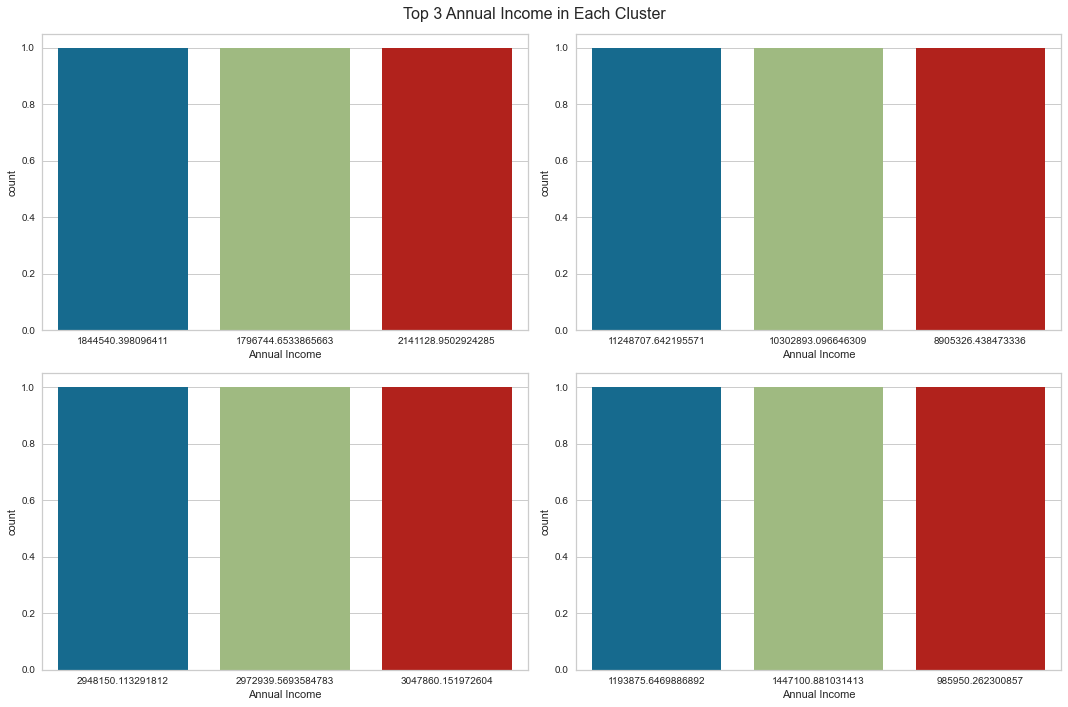

In [68]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Annual Income in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Annual Income', data=Cluster_0, order=Cluster_0['Annual Income'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Annual Income', data=Cluster_1, order=Cluster_1['Annual Income'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Annual Income', data=Cluster_2, order=Cluster_2['Annual Income'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Annual Income', data=Cluster_3, order=Cluster_3['Annual Income'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [69]:
[Cluster_0['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(), 
 Cluster_1['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(), 
 Cluster_2['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(), 
 Cluster_3['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head()]

[Yes      238
 Maybe     75
 No        55
 Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64,
 Yes    7
 Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64,
 Yes      283
 Maybe     87
 No        60
 Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64,
 Yes      135
 Maybe     39
 No        21
 Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64]

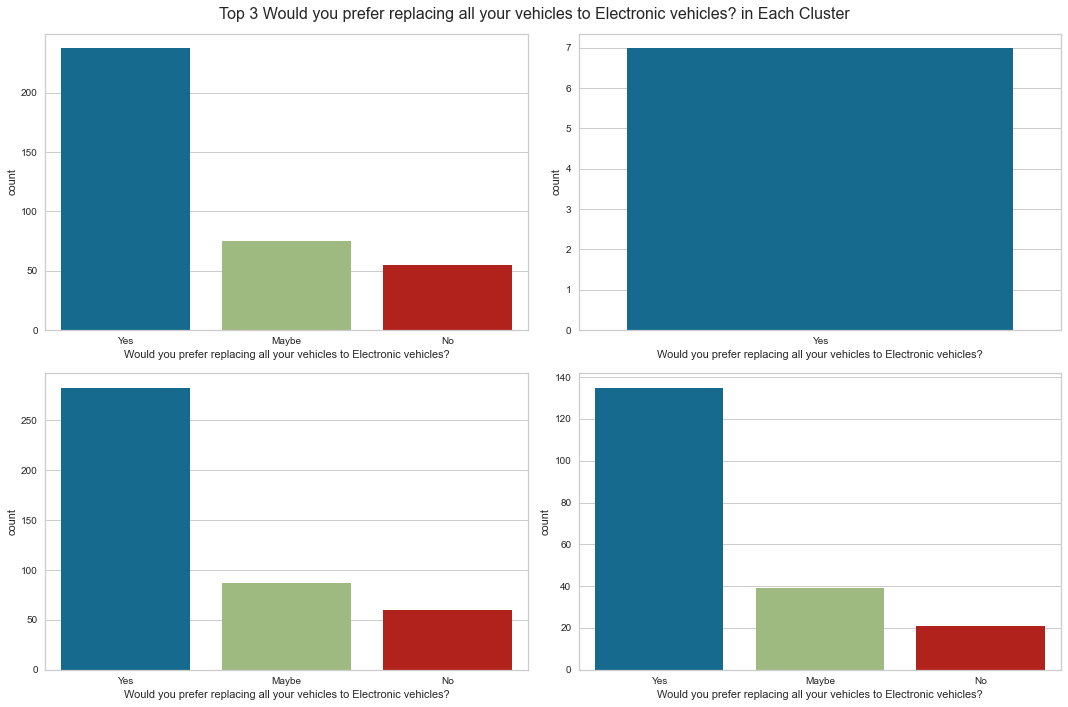

In [70]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Would you prefer replacing all your vehicles to Electronic vehicles? in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Would you prefer replacing all your vehicles to Electronic vehicles?', data=Cluster_0, order=Cluster_0['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Would you prefer replacing all your vehicles to Electronic vehicles?', data=Cluster_1, order=Cluster_1['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Would you prefer replacing all your vehicles to Electronic vehicles?', data=Cluster_2, order=Cluster_2['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Would you prefer replacing all your vehicles to Electronic vehicles?', data=Cluster_3, order=Cluster_3['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [71]:
[Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(), 
 Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(), 
 Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(), 
 Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head()]

[SUV          176
 Sedan         84
 Hatchback     55
 Liftback      43
 Cabrio        10
 Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64,
 SUV          3
 Sedan        2
 Hatchback    1
 Liftback     1
 Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64,
 SUV          191
 Sedan        115
 Hatchback     62
 Liftback      46
 Cabrio        16
 Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64,
 SUV          97
 Sedan        39
 Liftback     30
 Hatchback    26
 Cabrio        3
 Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64]

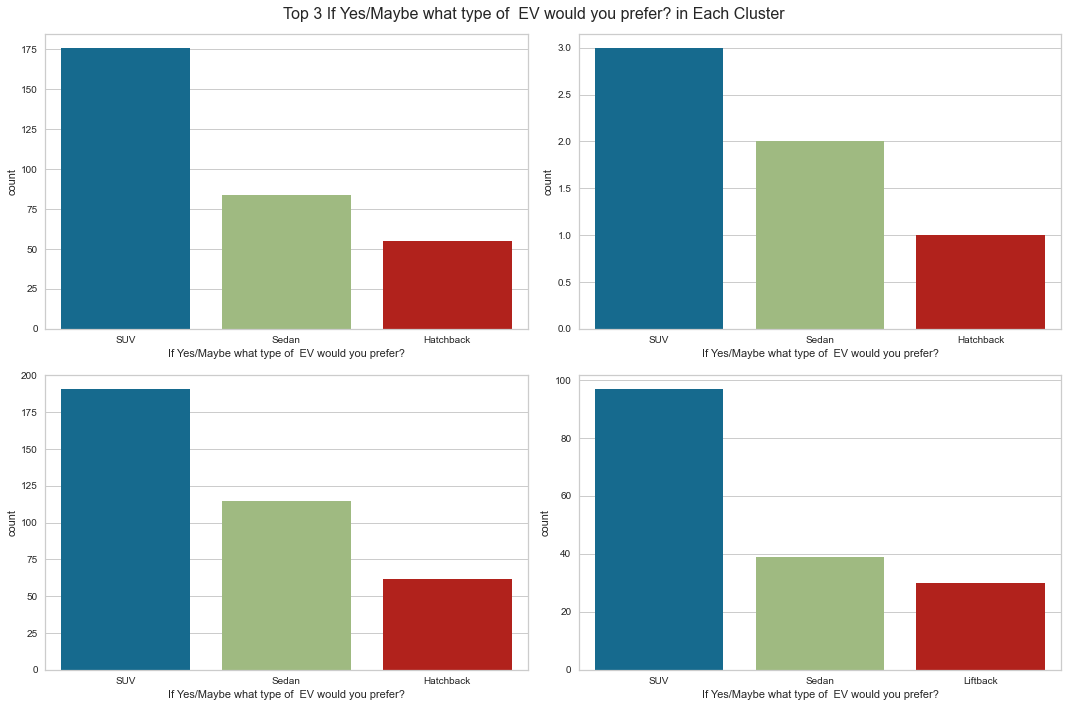

In [72]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 If Yes/Maybe what type of  EV would you prefer? in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='If Yes/Maybe what type of  EV would you prefer?', data=Cluster_0, order=Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='If Yes/Maybe what type of  EV would you prefer?', data=Cluster_1, order=Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='If Yes/Maybe what type of  EV would you prefer?', data=Cluster_2, order=Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='If Yes/Maybe what type of  EV would you prefer?', data=Cluster_3, order=Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [73]:
[Cluster_0['Do you think Electronic Vehicles are economical?'].value_counts().head(), 
 Cluster_1['Do you think Electronic Vehicles are economical?'].value_counts().head(), 
 Cluster_2['Do you think Electronic Vehicles are economical?'].value_counts().head(), 
 Cluster_3['Do you think Electronic Vehicles are economical?'].value_counts().head()]

[Yes      285
 Maybe     43
 No        40
 Name: Do you think Electronic Vehicles are economical?, dtype: int64,
 Yes      4
 Maybe    2
 No       1
 Name: Do you think Electronic Vehicles are economical?, dtype: int64,
 Yes      330
 Maybe     53
 No        47
 Name: Do you think Electronic Vehicles are economical?, dtype: int64,
 Yes      149
 Maybe     25
 No        21
 Name: Do you think Electronic Vehicles are economical?, dtype: int64]

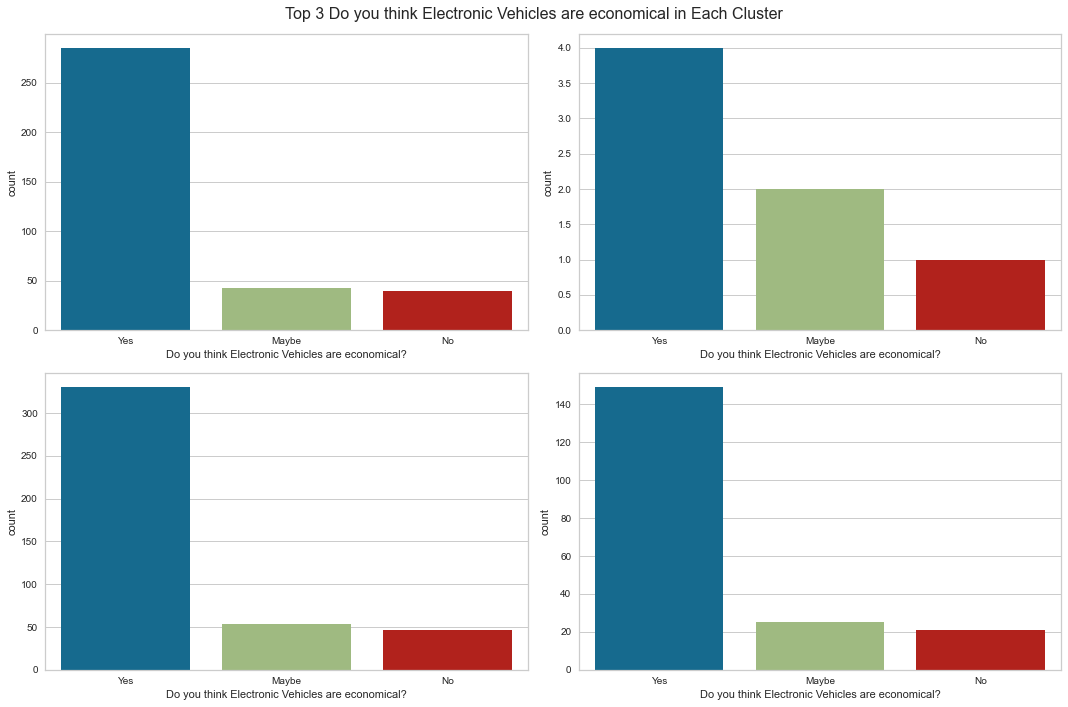

In [74]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Do you think Electronic Vehicles are economical in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Do you think Electronic Vehicles are economical?', data=Cluster_0, order=Cluster_0['Do you think Electronic Vehicles are economical?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Do you think Electronic Vehicles are economical?', data=Cluster_1, order=Cluster_1['Do you think Electronic Vehicles are economical?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Do you think Electronic Vehicles are economical?', data=Cluster_2, order=Cluster_2['Do you think Electronic Vehicles are economical?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Do you think Electronic Vehicles are economical?', data=Cluster_3, order=Cluster_3['Do you think Electronic Vehicles are economical?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [75]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Tata       69
 Hyundai    61
 KIA        54
 Honda      52
 Nissan     47
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       78
 Hyundai    70
 Honda      65
 KIA        61
 Nissan     53
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       36
 Hyundai    33
 KIA        28
 Honda      26
 Nissan     22
 Name: Which brand of vehicle do you currently own?, dtype: int64]

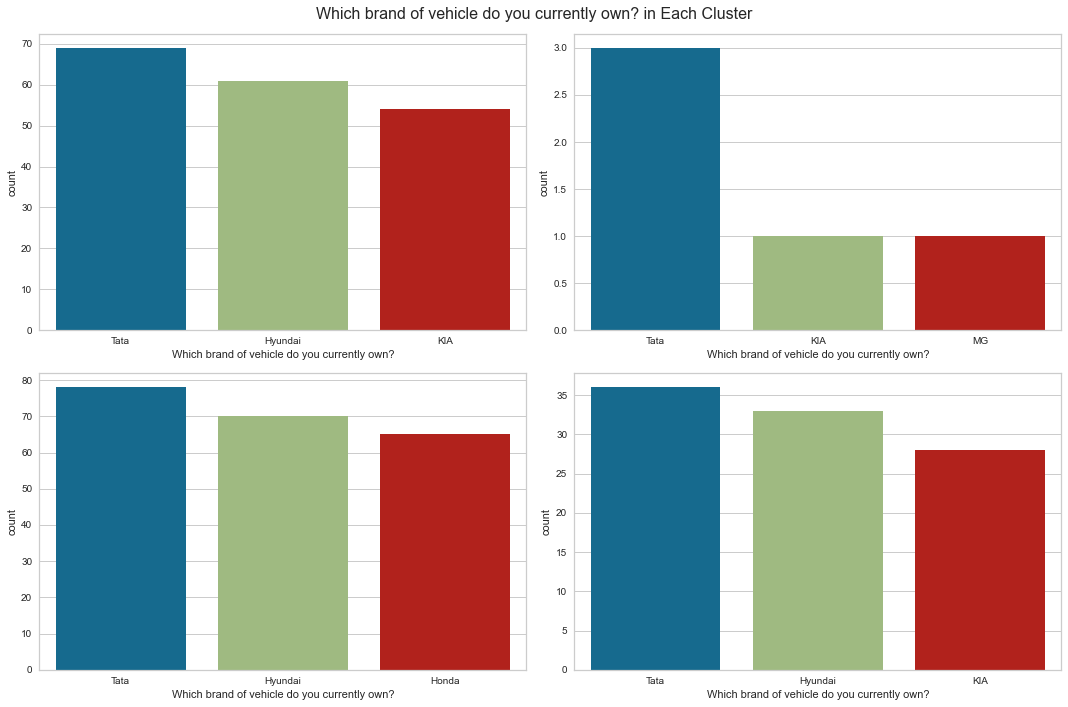

In [76]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Which brand of vehicle do you currently own? in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Which brand of vehicle do you currently own?', data=Cluster_0, order=Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Which brand of vehicle do you currently own?', data=Cluster_1, order=Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Which brand of vehicle do you currently own?', data=Cluster_2, order=Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Which brand of vehicle do you currently own?', data=Cluster_3, order=Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [77]:
[Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head(), 
 Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head(), 
 Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head(), 
 Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head()]

[<15 lakhs    162
 <5 lakhs     105
 <25 lakhs     69
 >25 lakhs     14
 700000         6
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 <15 lakhs    3
 <5 lakhs     3
 <25 lakhs    1
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 <15 lakhs    216
 <5 lakhs     127
 <25 lakhs     49
 >25 lakhs     15
 1200000        7
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64,
 <15 lakhs    102
 <5 lakhs      53
 <25 lakhs     29
 >25 lakhs      5
 1200000        3
 Name: How much money could you spend on an Electronic vehicle?, dtype: int64]

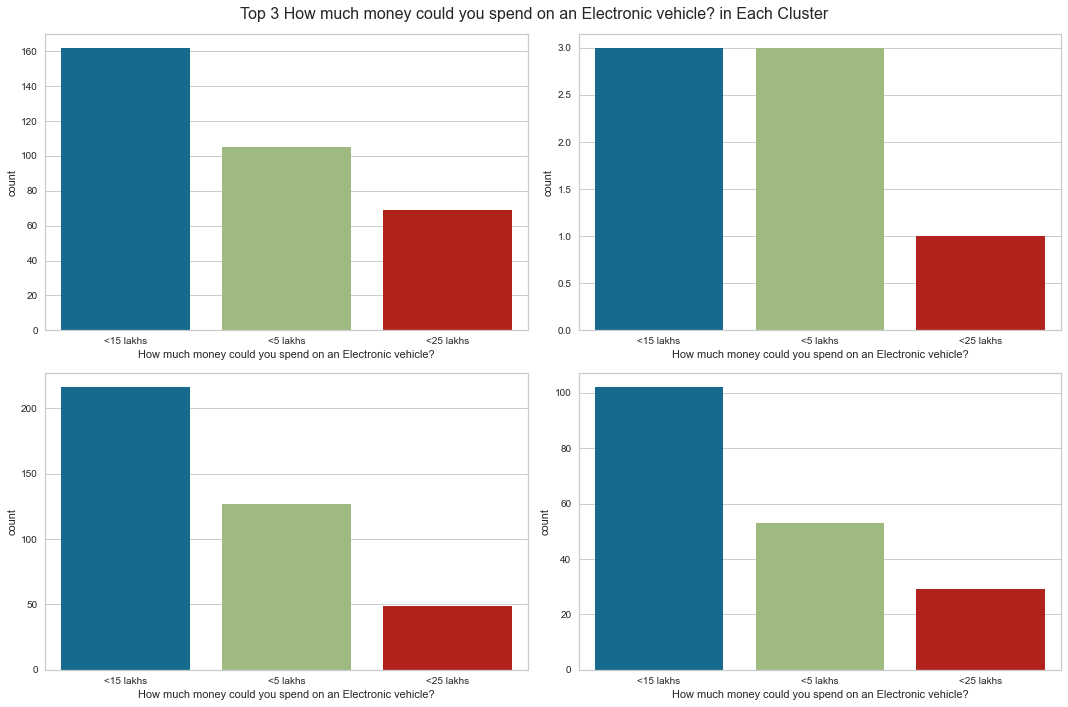

In [78]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 How much money could you spend on an Electronic vehicle? in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='How much money could you spend on an Electronic vehicle?', data=Cluster_0, order=Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='How much money could you spend on an Electronic vehicle?', data=Cluster_1, order=Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='How much money could you spend on an Electronic vehicle?', data=Cluster_2, order=Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='How much money could you spend on an Electronic vehicle?', data=Cluster_3, order=Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [79]:
[Cluster_0['Preference for wheels in EV'].value_counts().head(), 
 Cluster_1['Preference for wheels in EV'].value_counts().head(), 
 Cluster_2['Preference for wheels in EV'].value_counts().head(), 
 Cluster_3['Preference for wheels in EV'].value_counts().head()]

[4    231
 2    101
 3     36
 Name: Preference for wheels in EV, dtype: int64,
 4    4
 2    2
 3    1
 Name: Preference for wheels in EV, dtype: int64,
 4    263
 2    125
 3     42
 Name: Preference for wheels in EV, dtype: int64,
 4    131
 2     52
 3     12
 Name: Preference for wheels in EV, dtype: int64]

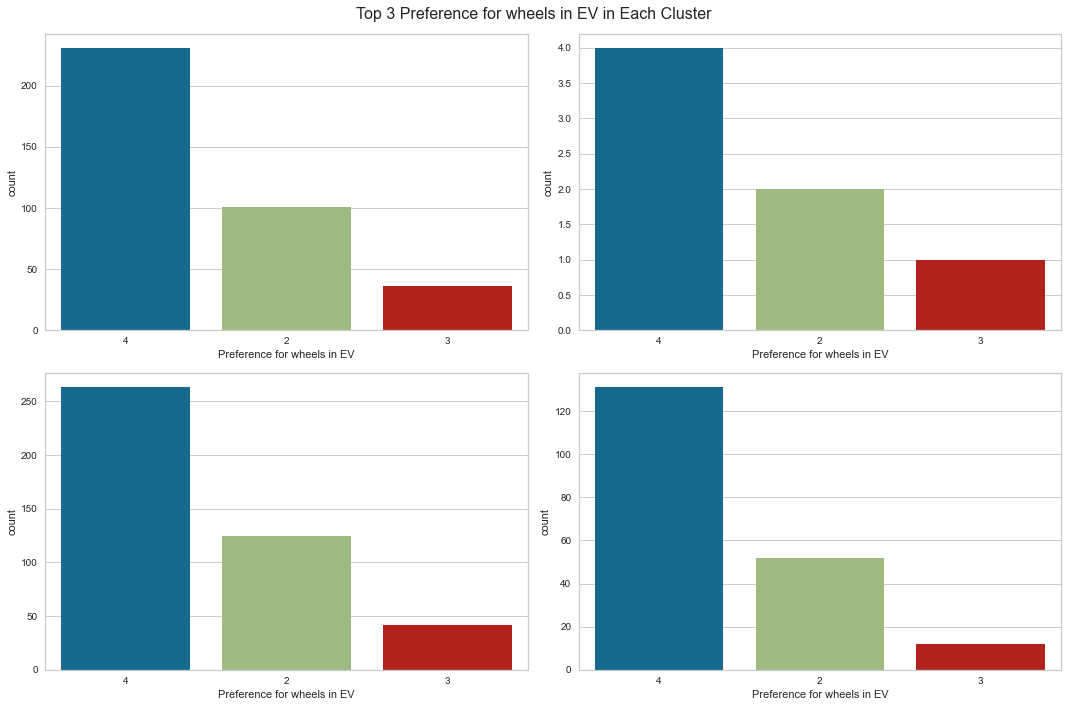

In [80]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2,figsize=(15, 10))
fig.suptitle('Top 3 Preference for wheels in EV in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Preference for wheels in EV', data=Cluster_0, order=Cluster_0['Preference for wheels in EV'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Preference for wheels in EV', data=Cluster_1, order=Cluster_1['Preference for wheels in EV'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Preference for wheels in EV', data=Cluster_2, order=Cluster_2['Preference for wheels in EV'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Preference for wheels in EV', data=Cluster_3, order=Cluster_3['Preference for wheels in EV'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [81]:
[Cluster_0['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(), 
 Cluster_1['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(), 
 Cluster_2['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(), 
 Cluster_3['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head()]

[Yes, in <10 years               157
 Yes, in <20years                133
 Yes, possibly after 20 years     53
 I don't think so                 25
 Name: Do you think Electronic vehicles will replace fuel cars in India?, dtype: int64,
 Yes, in <10 years               4
 Yes, possibly after 20 years    2
 Yes, in <20years                1
 Name: Do you think Electronic vehicles will replace fuel cars in India?, dtype: int64,
 Yes, in <10 years               183
 Yes, in <20years                175
 Yes, possibly after 20 years     55
 I don't think so                 17
 Name: Do you think Electronic vehicles will replace fuel cars in India?, dtype: int64,
 Yes, in <20years                78
 Yes, in <10 years               75
 Yes, possibly after 20 years    22
 I don't think so                20
 Name: Do you think Electronic vehicles will replace fuel cars in India?, dtype: int64]

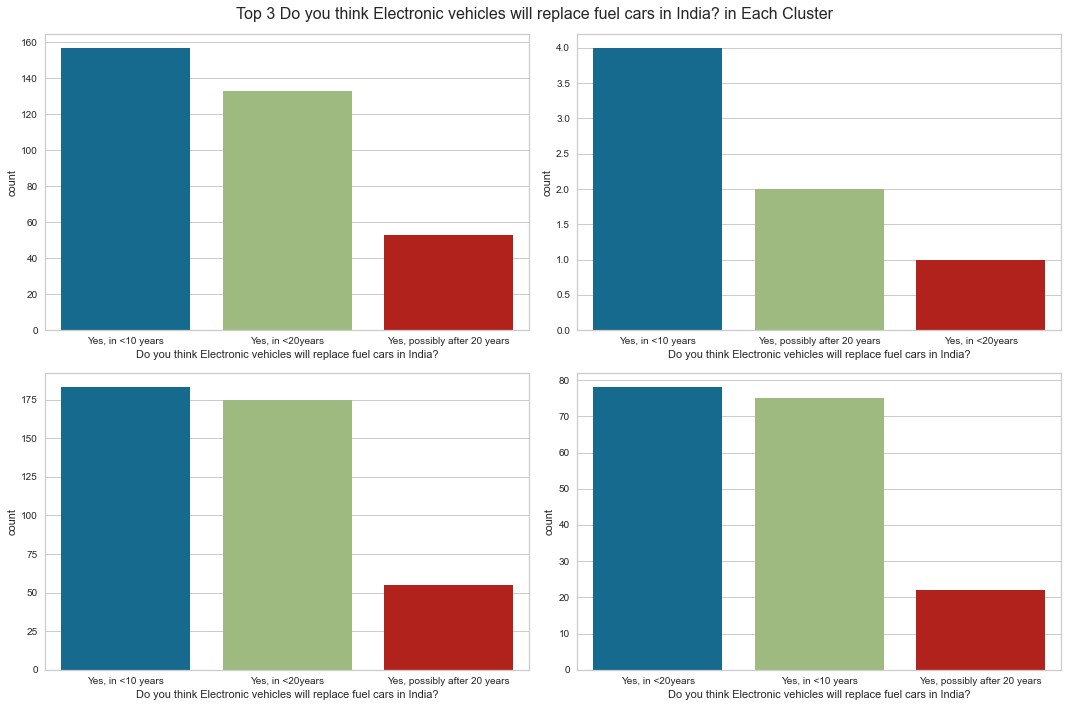

In [82]:
# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 3 Do you think Electronic vehicles will replace fuel cars in India? in Each Cluster', fontsize=16)

# Plot for Cluster_0
sns.countplot(x='Do you think Electronic vehicles will replace fuel cars in India?', data=Cluster_0, order=Cluster_0['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(3).index, ax=axes[0, 0])

# Plot for Cluster_1
sns.countplot(x='Do you think Electronic vehicles will replace fuel cars in India?', data=Cluster_1, order=Cluster_1['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(3).index, ax=axes[0, 1])

# Plot for Cluster_2
sns.countplot(x='Do you think Electronic vehicles will replace fuel cars in India?', data=Cluster_2, order=Cluster_2['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(3).index, ax=axes[1, 0])

# Plot for Cluster_3
sns.countplot(x='Do you think Electronic vehicles will replace fuel cars in India?', data=Cluster_3, order=Cluster_3['Do you think Electronic vehicles will replace fuel cars in India?'].value_counts().head(3).index, ax=axes[1, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [83]:
data.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

**CALCULATING PERCENTAGE**

In [84]:
# List of columns to calculate percentages for
columns_to_analyze = [
    'Age', 'City', 'Profession', 'Marital Status', 'Education',
    'No. of Family members', 'Annual Income',
    'Would you prefer replacing all your vehicles to Electronic vehicles?',
    'If Yes/Maybe what type of  EV would you prefer?',
    'Do you think Electronic Vehicles are economical?',
    'Which brand of vehicle do you currently own?',
    'How much money could you spend on an Electronic vehicle?',
    'Preference for wheels in EV',
    'Do you think Electronic vehicles will replace fuel cars in India?'
]

# Function to calculate percentages
def calculate_percentage(cluster_data):
    return (cluster_data.value_counts() / len(cluster_data)) * 100

# Calculate percentages for each column in each cluster
for cluster_num in range(4):  # Assuming there are 4 clusters (0, 1, 2, 3)
    print(f"Percentage for Cluster_{cluster_num}:")
    cluster_data = new_data[new_data['Cluster'] == cluster_num]
    for column in columns_to_analyze:
        column_percentages = calculate_percentage(cluster_data[column])
        print(f"{column}:")
        print(column_percentages)
        print("\n")

Percentage for Cluster_0:
Age:
29     12.228261
28     11.413043
30     10.054348
31      9.782609
27      9.510870
26      6.521739
32      6.250000
25      6.250000
24      5.163043
22      2.173913
23      1.902174
21      1.358696
60      1.358696
46      1.086957
59      1.086957
66      0.815217
19      0.815217
45      0.815217
57      0.815217
43      0.815217
56      0.815217
62      0.543478
65      0.543478
39      0.543478
33      0.543478
58      0.543478
20      0.543478
44      0.543478
49      0.543478
55      0.543478
17      0.271739
50      0.271739
47      0.271739
63      0.271739
18      0.271739
118     0.271739
15      0.271739
53      0.271739
52      0.271739
61      0.271739
54      0.271739
36      0.271739
82      0.271739
48      0.271739
38      0.271739
Name: Age, dtype: float64


City:
Pune           56.521739
Pune            4.347826
Mumbai          3.804348
Satara          2.445652
Nagpur          2.173913
Delhi           2.173913
Nellore         1.90

1-Based on cluster 0 to 3 Age 28 to 31  are been targeted

2-Pune 56.52% and Mumbai 3.8% are the location for EV Segemntation,
Delhi and New Delhi also

3-Maritial Status  59.78% focus on Single person is targeted

4-No of family members in each clusters 3,4,5 that members are interest [12.50 to 52.71]

5-Type of EV like SVU 47.82%, Sedan 22.82% ,Hatchback 14.94% , are very much interest

6-EV are good economical in market, most of the people tells YES 77.44%

7- Companies like Tata 18.75% ,Hyundai 16.57% ,KIA 14.67% are EV that mostly people are using currently

8-customers spend money in range 5 lakhs to 25 lakhs , 44.02% to 18.75%

**OUTCOME**

**Based on the above information, the company should focus its marketing strategies and product offerings on SUVs, target locations like Pune, Mumbai, Delhi, and New Delhi, cater to the needs of single individuals and families with 3 to 5 members, and emphasize the economic benefits of EV ownership. Additionally, partnering with popular brands like Tata, Hyundai, and KIA can help capture a larger share of the EV market. By aligning their efforts with these insights, the company can drive higher profits and achieve greater success in the EV segment.**

**-----------PSYCHOGRAPHIS SEGMENTATION TARGETS ["AGE","MARITAL STATUS","NO OF FAMILY MEMBERS","EV ECONOMICAL MARKET","MONEY SPENDS"]-----------**